*  #### Index
    *  [Building the Model](#building-the-model)
    *  [Training Model](#training-model)
    

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv("/Users/emrecanciftci/betik/2024_bio/data/11_Ch11/Supplementary files/heart.csv")

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
# Data scaling

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=0)

In [5]:
tf.__version__

'2.17.0'

In [6]:
# Model – As a List of Layers (1of the 2 ways)

model = Sequential(
    [Dense(units=2),
    Dense(units=2),
    Dense(units=1)]
)
print(type(model))
print(model)

<class 'keras.src.models.sequential.Sequential'>
<Sequential name=sequential, built=False>


In [7]:
# Model – Adding in Layers One by One

model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(1))

print(model)

<Sequential name=sequential_1, built=False>


### Building the Model <a class="anchor" id="buildin-model"></a>


In [6]:
model = Sequential()

model.add(Dense(units=13, activation="relu", input_shape= (13,)))
model.add(Dense(units=7, activation="relu"))

model.add(Dense(units=1, activation="sigmoid"))

# For a binary classification problem

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "precision"])

model.summary()


/Users/emrecanciftci/miniconda3/envs/cool-bio/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            98 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288 (1.12 KB)

 Trainable params: 288 (1.12 KB)

 Non-trainable params: 0 (0.00 B)

### Training Model <a class="anchor" id="training-model"></a>


In [7]:
model.fit(x= X_train, y= y_train, epochs=400,
          validation_data=(X_test, y_test), verbose= 1)

Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6140 - loss: 0.6730 - precision: 0.6908 - val_accuracy: 0.6184 - val_loss: 0.6711 - val_precision: 0.8182
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6534 - loss: 0.6604 - precision: 0.7692 - val_accuracy: 0.6579 - val_loss: 0.6619 - val_precision: 0.8400
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6970 - loss: 0.6542 - precision: 0.8161 - val_accuracy: 0.6842 - val_loss: 0.6533 - val_precision: 0.8276
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7298 - loss: 0.6428 - precision: 0.8217 - val_accuracy: 0.6842 - val_loss: 0.6455 - val_precision: 0.8065
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7263 - loss: 0.6343 - precision: 0.8223 - val_accuracy: 0.6974 - val_loss: 0.6369 - val_precision: 0.8125
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7447 - loss: 0.6258 - precision: 0.8139 - val_accuracy: 0.7500 - val_loss: 0.6271 - val_p

### Overfitting

In [9]:
model_performance = pd.DataFrame(model.history.history)

model_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   accuracy       400 non-null    float64
 1   loss           400 non-null    float64
 2   precision      400 non-null    float64
 3   val_accuracy   400 non-null    float64
 4   val_loss       400 non-null    float64
 5   val_precision  400 non-null    float64
dtypes: float64(6)
memory usage: 18.9 KB


Text(0.5, 0, 'epoch')

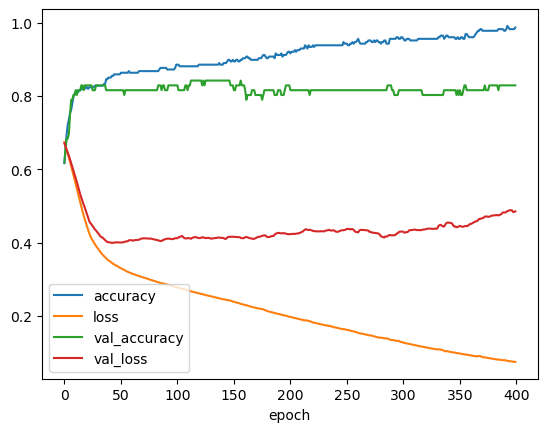

In [23]:
ax = model_performance.iloc[:, [0,1,3,4]].plot()
ax.set_xlabel("epoch")